In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import AnchoredText
from matplotlib.ticker import PercentFormatter
pd.set_option('display.max_rows', 100)

AttributeError: module 'numpy' has no attribute 'ndarray'

In [19]:
data = pd.read_excel('Data Dump _ Customer Metrics (make a copy).xlsx', sheet_name = 'Raw CM Data')

In [389]:
data_raw = data.copy()

In [390]:
data.head()

,Customer Success Associate,Parent Restaurant name,Unique Location ID,Highest Product,# Printers,# Tablets,Orders Week 2,Orders Week 1,Printed Orders Week 2,Printed Orders Week 1,Cancellations Week 2,Cancellations Week 1,Missed Orders Week 2,Missed Orders Week 1,Average Order Week 2,Average Order Value week 1,Last Product Usage Date,Payment Status,Activation Date,Number of online delivery partners
0,Jimmy,Restaurant 747,06dc26c0-9998-4912-b026-dd0e3e8acdff,Order Manager,1,1,47.0,60.0,47.0,60.0,0.0,2.0,0.0,0.0,24.99,22.71,2022-01-15 10:50:00,Active,2021-09-28,2.0
1,Jimmy,Restaurant 432,36677987-7739-492d-a034-f94f22bae72f,Premium,0,0,37.0,46.0,0.0,0.0,2.0,2.0,0.0,0.0,36.19,29.57,2022-01-15 10:07:00,NaN,2020-08-11,3.0
2,Jimmy,Restaurant 747,1955165c-d286-4d09-aed9-27c908c26503,Order Manager,1,1,63.0,66.0,62.0,66.0,1.0,1.0,0.0,0.0,29.43,29.72,2022-01-15 10:53:00,Active,2021-06-16,2.0
3,Jimmy,Restaurant 747,fc15619e-87c6-4326-8f20-e71b8bd55662,Order Manager,1,1,50.0,48.0,50.0,48.0,0.0,2.0,0.0,0.0,31.22,26.58,2022-01-15 10:09:00,Active,2021-06-16,2.0
4,Jimmy,Restaurant 719,ef394528-735d-4307-aebe-034aa5e4966c,Premium + POS,1,0,534.0,565.0,0.0,0.0,2.0,3.0,0.0,0.0,47.72,46.22,2022-01-15 10:59:00,Active,2021-03-22,2.0


In [391]:
data.describe()

,# Printers,# Tablets,Orders Week 2,Orders Week 1,Printed Orders Week 2,Printed Orders Week 1,Cancellations Week 2,Cancellations Week 1,Missed Orders Week 2,Missed Orders Week 1,Average Order Week 2,Average Order Value week 1,Number of online delivery partners
count,4424.000000,4424.000000,3938.000000,3938.000000,3938.000000,3938.000000,3938.000000,3938.000000,3938.000000,3938.000000,3622.000000,3716.000000,4220.000000
mean,0.455922,0.698011,123.319451,125.220670,58.980701,58.484256,2.578720,3.091925,0.015490,0.014982,33.481803,32.247239,1.383412
std,0.525928,0.459665,216.125470,211.526847,172.541715,143.952656,5.503551,6.644932,0.170206,0.154614,15.498453,15.321459,0.901874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.510000,23.755000,1.000000
50%,0.000000,1.000000,62.000000,63.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,29.910000,28.925000,2.000000
75%,1.000000,1.000000,157.750000,162.000000,62.750000,61.750000,3.000000,4.000000,0.000000,0.000000,37.497500,36.150000,2.000000
max,4.000000,2.000000,6938.000000,6409.000000,6907.000000,3276.000000,141.000000,166.000000,7.000000,5.000000,250.910000,306.610000,5.000000


In [392]:
data.dtypes

Customer Success Associate                    object
Parent Restaurant name                        object
Unique Location ID                            object
Highest Product                               object
# Printers                                     int64
# Tablets                                      int64
Orders Week 2                                float64
Orders Week 1                                float64
Printed Orders Week 2                        float64
Printed Orders Week 1                        float64
Cancellations Week 2                         float64
Cancellations Week 1                         float64
Missed Orders Week 2                         float64
Missed Orders Week 1                         float64
Average Order Week 2                         float64
Average Order Value week 1                   float64
Last Product Usage Date               datetime64[ns]
Payment Status                                object
Activation Date                       datetime

In [393]:
data.isnull().sum()

Customer Success Associate              0
Parent Restaurant name                  0
Unique Location ID                      7
Highest Product                       113
# Printers                              0
# Tablets                               0
Orders Week 2                         486
Orders Week 1                         486
Printed Orders Week 2                 486
Printed Orders Week 1                 486
Cancellations Week 2                  486
Cancellations Week 1                  486
Missed Orders Week 2                  486
Missed Orders Week 1                  486
Average Order Week 2                  802
Average Order Value week 1            708
Last Product Usage Date               786
Payment Status                        778
Activation Date                        24
Number of online delivery partners    204
dtype: int64

One unique location ID should correspond to one parent restaurant. Since the actication dates are different, the current assumption for the above result is that, the same location may have experienced a change in store owners, so this has led to a change in the parent store. If the current assumption is not hold, further data investigation may be needed.

## Missing Value

In [394]:
class profiling:
    
    def histplt (val: list,bins: int,title: str,xlabl: str,ylabl: str,xlimt: list,
                 ylimt: list=False, loc: int =1,legend: int=1,axt=None,days: int=False,
                 class_: int=False,scale: int=1,x_tick: list=False, calc_perc: bool= True,
                 nsplit: int=1,font: int=5,color: str='b') -> [float] :
        
        """ Histogram including important statistics """
        
        ax1 = axt or plt.axes()
        font = {'size'   : font }
        plt.rc('font', **font) 
        
        miss_n = len(val[np.isnan(val)])
        tot = len(val)
        n_distinct = len(np.unique(val))
        miss_p = (len(val[np.isnan(val)])/tot)*100
        val = val[~np.isnan(val)]        
        val = np.array(val)
        plt.hist(val, bins=bins, weights=np.ones(len(val)) / len(val),ec='black',color=color)
        n_nonmis = len(val[~np.isnan(val)])
        if class_: 
            times = 100
        else:
            times = 1 
        Mean = np.nanmean(val)*times
        Median = np.nanmedian(val)*times
        sd = np.sqrt(np.nanvar(val))
        Max = np.nanmax(val)
        Min = np.nanmin(val)
        p1 = np.quantile(val, 0.01)
        p25 = np.quantile(val, 0.25)
        p75 = np.quantile(val, 0.75)
        p99 = np.quantile(val, 0.99)
        
        if calc_perc == True:
            txt = 'n (not missing)=%.0f\nn_distinct=%.0f\nMissing=%.1f%%\nMean=%0.2f\nσ=%0.1f\np1%%=%0.1f\np99%%=%0.1f\nMin=%0.1f\nMax=%0.1f'       
            anchored_text = AnchoredText(txt %(n_nonmis,n_distinct,miss_p,Mean,sd,p1,p99,Min,Max), borderpad=0, 
                                         loc=loc,prop={ 'size': font['size']*scale})    
        else:
            txt = 'n (not missing)=%.0f\nn_distinct=%.0f\nMissing=%.1f%%\nMean=%0.2f\nσ=%0.1f\nMin=%0.1f\nMax=%0.1f'       
            anchored_text = AnchoredText(txt %(n_nonmis,n_distinct,miss_p,Mean,sd,Min,Max), borderpad=0, 
                                         loc=loc,prop={ 'size': font['size']*scale})                
            
        if(legend==1): ax1.add_artist(anchored_text)
        if (scale): plt.title(title,fontsize=font['size']*(scale+0.15))
        else:       plt.title(title)
        plt.xlabel(xlabl,fontsize=font['size']) 
        ax1.set_ylabel('Frequency',fontsize=font['size'])
        if (scale): ax1.set_xlabel(xlabl,fontsize=font['size']*scale)
        else:       ax1.set_xlabel(xlabl)
        try:
            xlabl
        except NameError:
            pass    
        else:
            if (scale): plt.xlabel(xlabl,fontsize=font['size']*scale) 
            else:        plt.xlabel(xlabl)   
        try:
            ylabl
        except NameError:
            pass      
        else:
            if (scale): plt.ylabel(ylabl,fontsize=font['size']*scale)  
            else:         plt.ylabel(ylabl)  
            
        if (class_==True): plt.xticks([0,1])
        plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
        ax1.grid(linewidth='0.1')
        try:
            xlimt
        except NameError:
            pass  
        else:
            plt.xlim(xlimt) 
        try:
            ylimt
        except NameError:
            pass  
        else:
            plt.ylim(ylimt)  
            
        if x_tick: plt.xticks(x_tick,fontsize=font['size']*scale)    
        plt.yticks(fontsize=font['size']*scale)  
        plt.grid(linewidth='0.12')
        
        # Interquartile Range Method for outlier detection
        iqr = p75 - p25
        
        # calculate the outlier cutoff
        cut_off = np.array(iqr) * 1.5
        lower, upper = p25 - cut_off, p75 + cut_off        
                
        
        return tot, n_nonmis, n_distinct, miss_n, miss_p, Mean, Median, sd, Max, Min, p1, p25, p75, p99, sd
    
##############################################################################        
        
    def bargraph(val_ob: [list],  title: str, ylabel: str, titlefontsize: int=10, xfontsize: int=5,scale: int=1, 
                 yfontsize: int=8, select: bool= False, fontsizelable: bool= False, xshift: float=-0.1, nsim: int=False
                 ,yshift: float=0.01,percent: bool=False, xlim: list=False, axt: bool=None, color: str='b',sort=True,
                 ylim: list=False, y_rot: int=0, ytick_rot: int=90, graph_float: int=1, loc: int =1,legend: int=1) -> None:
        
        """ vertical bargraph """
        
        ax1 = axt or plt.axes()

        tot = len(val_ob)
        miss_p_ob = (len(val_ob[pd.isnull(val_ob)])/tot)*100        
        n_nonmis_ob = len(val_ob[~pd.isnull(val_ob)])    
        con = np.array(val_ob.value_counts())
        len_ = len(con)
        if len_ > 10: len_ = 10
        cats = list(val_ob.value_counts().keys())
        val_ob = con[:len_]
        clmns = cats[:len_]
        # Sort counts
        if sort:
            sort_score = sorted(zip(val_ob,clmns), reverse=True)
            Clmns_sort = [sort_score[i][1] for i in range(len(clmns))]
            sort_score = [sort_score[i][0] for i in range(len(clmns))]              
        else:
            Clmns_sort = clmns
            sort_score = val_ob
        index1 = np.arange(len(clmns))
        if (select):
            Clmns_sort=Clmns_sort[:select]
            sort_score=sort_score[:select]
        ax1.bar(Clmns_sort, sort_score, width=0.6, align='center', alpha=1, edgecolor='k', capsize=4,color=color)
        plt.title(title,fontsize=titlefontsize)
        ax1.set_ylabel(ylabel,fontsize=yfontsize)
        ax1.set_xticks(np.arange(len(Clmns_sort)))
        
        ax1.set_xticklabels(Clmns_sort,fontsize=xfontsize, rotation=ytick_rot,y=0.02)   
        if (percent): plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
        ax1.xaxis.grid(color='k', linestyle='--', linewidth=0.2) 
        if (xlim): plt.xlim(xlim)
        if (ylim): plt.ylim(ylim)
        if (fontsizelable):
            for ii in range(len(sort_score)):
                if (percent):
                    plt.text(xshift+ii, sort_score[ii]+yshift,f'{"{0:.2f}".format(sort_score[ii]*100)}%',
                    fontsize=fontsizelable,rotation=y_rot,color='k')     
                else:
                    plt.text(xshift+ii, sort_score[ii]+yshift,f'{np.round(sort_score[ii],graph_float)}',
                        fontsize=fontsizelable,rotation=y_rot,color='k')                                 
        dic_Clmns = {}
        for i in range(len(Clmns_sort)):
            dic_Clmns[Clmns_sort[i]]=sort_score[i]
            
        txt = 'n (not missing)=%.0f\nMissing=%.1f%%'       
        anchored_text = AnchoredText(txt %(n_nonmis_ob,miss_p_ob), borderpad=0, 
                                     loc=loc,prop={ 'size': font['size']})    
        if(legend==1): ax1.add_artist(anchored_text) 
        
###############################################################

    def bargraph_hor(val: [float], clmns: [str], title: str, ylabel: str, titlefontsize: int=10, xfontsize: int=5,scale: int=1, 
                 yfontsize: int=8, select: bool= False, fontsizelable: bool= False, xshift: float=-0.1, nsim: int=False
                 ,yshift: float=0.01,percent: bool=False, xlim: list=False, axt: bool=None, color: str='b',reverse: bool=False,
                 ylim: list=False, x_rot: int=0, graph_float: int=1, loc: int =1,legend: int=1) -> None:
        
        """ horizontal bargraph """
        
        ax1 = axt or plt.axes() 
        
        # Sort counts
        sort_score = sorted(zip(val,clmns), reverse=reverse)
        Clmns_sort = [sort_score[i][1] for i in range(len(clmns))]
        sort_score = [sort_score[i][0] for i in range(len(clmns))]              
        index1 = np.arange(len(clmns))
        if (select):
            Clmns_sort=Clmns_sort[:select]
            sort_score=sort_score[:select]
        ax1.barh(Clmns_sort, sort_score, align='center', height=0.6,lw = 2, edgecolor='black',color=color)
        plt.title(title,fontsize=titlefontsize)
        ax1.set_yticks(np.arange(len(Clmns_sort)))
        
        ax1.set_yticklabels(Clmns_sort,fontsize=yfontsize, rotation=0,y=0.02)   
        if (percent): plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
        ax1.grid(color='k', linestyle='--', linewidth=0.1) 
        if (xlim): plt.xlim(xlim)
        if (ylim): plt.ylim(ylim)
        if (fontsizelable):
            for ii in range(len(sort_score)):
                if (percent):
                    plt.text(sort_score[ii]+xshift, yshift+ii,f'{"{0:.2f}".format(sort_score[ii]*100)}%',
                    fontsize=fontsizelable,rotation=x_rot,color='k')     
                else:
                    plt.text(sort_score[ii]+xshift, yshift+ii,f'{np.round(sort_score[ii],graph_float)}',
                        fontsize=fontsizelable,rotation=x_rot,color='k')  

In [395]:
data.columns.to_list()

['Customer Success Associate',
 'Parent Restaurant name',
 'Unique Location ID',
 'Highest Product',
 '# Printers',
 '# Tablets',
 'Orders Week 2',
 'Orders Week 1',
 'Printed Orders Week 2',
 'Printed Orders Week 1',
 'Cancellations Week 2',
 'Cancellations Week 1',
 'Missed Orders Week 2',
 'Missed Orders Week 1',
 'Average Order Week 2',
 'Average Order Value week 1',
 'Last Product Usage Date',
 'Payment Status',
 'Activation Date',
 'Number of online delivery partners']

In [439]:
# correct  dtypes in Pandas DataFrame

feat_num = []
feat_obj = []
for iclm in data.columns.to_list():
    if  data[iclm].dtypes=='<M8[ns]':
        data[iclm] = [int(i.strftime('%y%j')) if pd.notna(i) else None for i in data[iclm]]# convert date to Julian date
        feat_num.append(iclm)
    else:
        try:
            pd.to_numeric(data[iclm])
            feat_num.append(iclm)
        except (ValueError, TypeError):
            feat_obj.append(iclm)
        
data[feat_num] = data[feat_num].astype(float)  
clmns = list(data.columns)

In [397]:
feat_num

['# Printers',
 '# Tablets',
 'Orders Week 2',
 'Orders Week 1',
 'Printed Orders Week 2',
 'Printed Orders Week 1',
 'Cancellations Week 2',
 'Cancellations Week 1',
 'Missed Orders Week 2',
 'Missed Orders Week 1',
 'Average Order Week 2',
 'Average Order Value week 1',
 'Last Product Usage Date',
 'Activation Date',
 'Number of online delivery partners']

<ipython-input-384-540950821655>:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(2,5,in_+1)


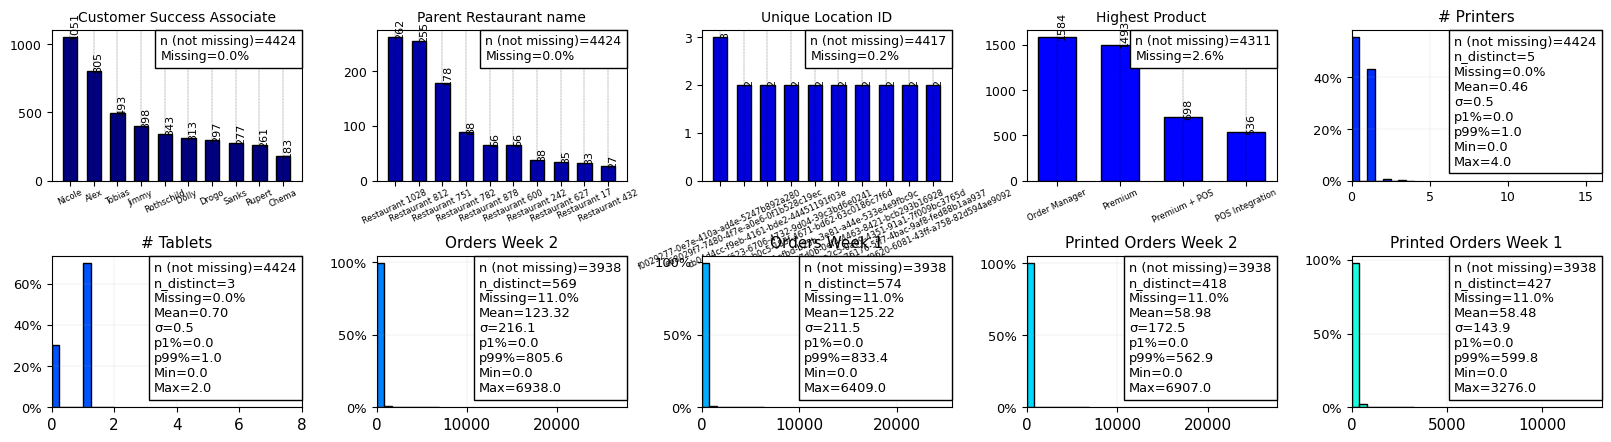

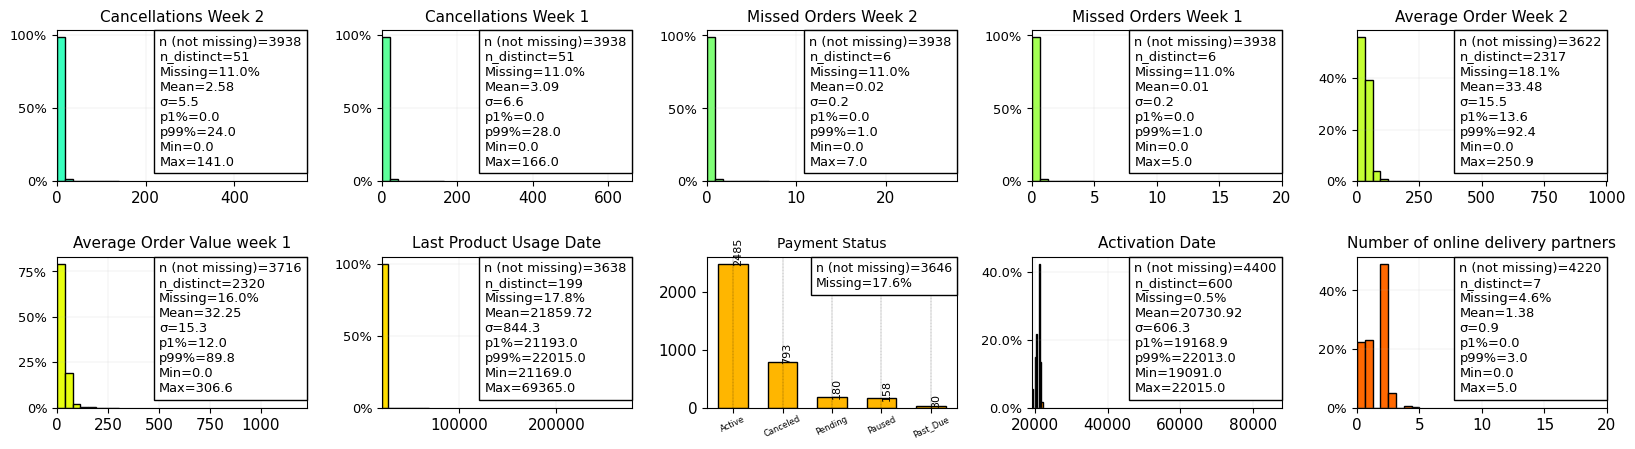

In [384]:
font = {'size': 9}
plt.rc('font', **font)
colors_map = plt.colormaps.get_cmap('jet')
colors = colors_map(np.linspace(0,0.8,len(data.columns)))
#
miss_n = [None]*len(feat_num)
miss_p = [None]*len(feat_num)
p1 = [None]*len(feat_num)
p99 = [None]*len(feat_num)
sd_num = [None]*len(feat_num)
#      
nfig1 = np.arange(0, len(data.columns),10)
nfig2 = np.arange(10, len(data.columns)+10,10)
ino = 0
num_count = 0
for ig in zip(nfig1, nfig2):
    in_ = 0
    fig, ax = plt.subplots(figsize=(20, 5), dpi= 100, facecolor='w', edgecolor='k') 
    for ir in range(ig[0],ig[1]):
        if ir < len(data.columns):
            ax1 = plt.subplot(2,5,in_+1) 
            if data.columns[ir] in feat_num:
                val = data[data.columns[ir]]
                _,_,_, miss_n[num_count], miss_p[num_count],_ ,_ ,_ ,_ ,_ ,\
                p1[num_count],_ ,_ ,p99[num_count] ,sd_num[num_count] = profiling.histplt (val,bins=8,title=f'{data.columns[ir]}',xlabl=None,days=False,
                                  ylabl=None,xlimt=(np.nanmin(val),np.nanmax(val)*4),ylimt=False
                                  ,axt=ax1,nsplit=5,scale=0.85,font=11,loc=1,color=colors[ir])
                num_count += 1
                
            elif data.columns[ir] in feat_obj:
                val_obj = data[data.columns[ir]]
                profiling.bargraph (val_obj, title=f'{data.columns[ir]}', ylabel='',titlefontsize=10, xfontsize=6,
                          yfontsize=7,percent=False,fontsizelable=8,xshift=0,color=colors[ir],legend=True,ytick_rot=25, y_rot=90, axt=ax1)                
                            
            in_ += 1
    ino += 1
    plt.subplots_adjust(hspace=0.5)
    plt.subplots_adjust(wspace=0.3)
    
    plt.show()

In [398]:
## Will directly drop data with null Location ID since we are exploring clients' info
#data = data.dropna(subset=['Unique Location ID'])
#data.shape

In [399]:
data.isnull().sum()

Customer Success Associate              0
Parent Restaurant name                  0
Unique Location ID                      7
Highest Product                       113
# Printers                              0
# Tablets                               0
Orders Week 2                         486
Orders Week 1                         486
Printed Orders Week 2                 486
Printed Orders Week 1                 486
Cancellations Week 2                  486
Cancellations Week 1                  486
Missed Orders Week 2                  486
Missed Orders Week 1                  486
Average Order Week 2                  802
Average Order Value week 1            708
Last Product Usage Date               786
Payment Status                        778
Activation Date                        24
Number of online delivery partners    204
dtype: int64

<ipython-input-400-27f3ff43c24d>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(1,2,2)


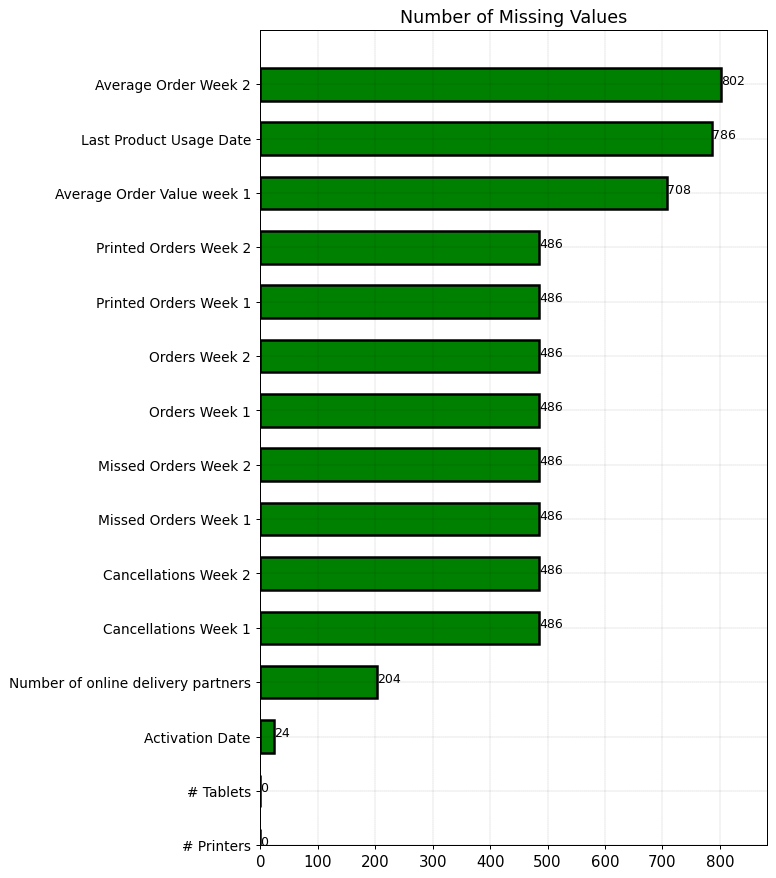

In [400]:
font = {'size'   : 12}
plt.rc('font', **font)
fig ,ax = plt.subplots(figsize=(16,12), dpi= 90, facecolor='w', edgecolor='k')

ax1 = plt.subplot(1,2,2) 
val = miss_n
profiling.bargraph_hor (val,feat_num, title=f'Number of Missing Values', ylabel='Numbers',titlefontsize=14, 
              xfontsize=6, yfontsize=11,percent=False,fontsizelable=10,xshift=0,color='g',
              yshift=0,ylim=[0,len(feat_num)], xlim=[-1,max(val)*1.1], x_rot=0, axt=ax1)
plt.show()

<ipython-input-401-c926e398515e>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(1,2,2)


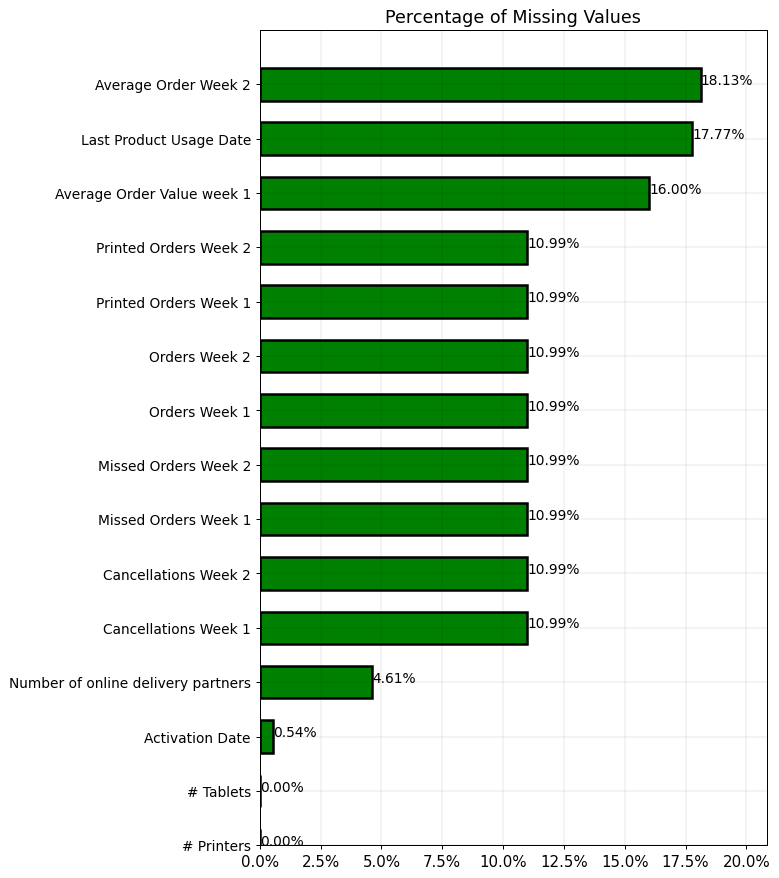

In [401]:
font = {'size'   : 12}
plt.rc('font', **font)
fig ,ax = plt.subplots(figsize=(16,12), dpi= 90, facecolor='w', edgecolor='k')

ax1 = plt.subplot(1,2,2) 
val = [i/100 for i in miss_p]
profiling.bargraph_hor (val,feat_num, title=f'Percentage of Missing Values', ylabel='Numbers',titlefontsize=14,
              xfontsize=6, yfontsize=11,percent=True,fontsizelable=11,xshift=0,color='g',
              yshift=0,ylim=[0,len(feat_num)], xlim=[0,max(val)*1.15], x_rot=0, axt=ax1)
plt.show()

In [402]:
df = data.copy()

In [403]:
df['Highest Product'].unique()

array(['Order Manager', 'Premium', 'Premium + POS', 'POS Integration',
       nan], dtype=object)

In [405]:
df = df.fillna(({'Highest Product':'Unknown', 'Payment Status':'Unknown', 
                 'Parent Restaurant name':'Unknown', 'Customer Success Associate':'Unknown'}))


# Plots

> Include null values

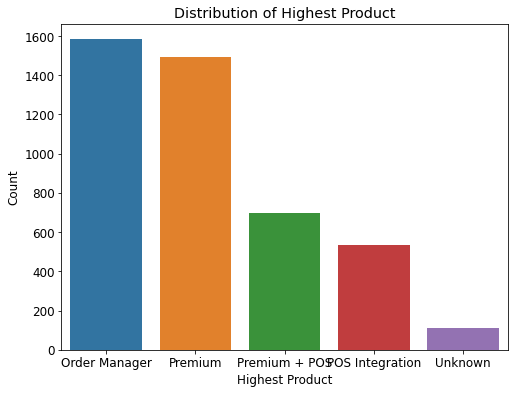

In [406]:
# Plot a bar chart of the number of customers for each product category
plt.figure(figsize=(8, 6))
sns.countplot(x='Highest Product', data=df)
plt.title('Distribution of Highest Product')
plt.xlabel('Highest Product')
plt.ylabel('Count')
plt.show()




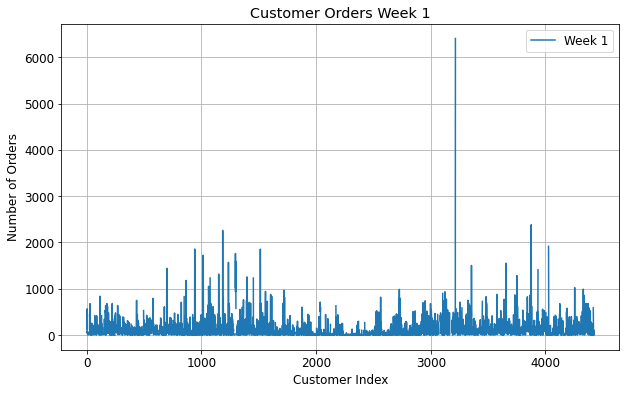

6409.0


In [408]:
# Line plot: Orders Week 1 and Week 2
plt.figure(figsize=(10, 6))
plt.plot(df['Orders Week 1'], label='Week 1')
#plt.plot(data['Orders Week 2'], label='Week 2')
plt.title('Customer Orders Week 1')
plt.xlabel('Customer Index')
plt.ylabel('Number of Orders')
plt.legend()
plt.grid()
plt.show()

print(data['Orders Week 1'].max())

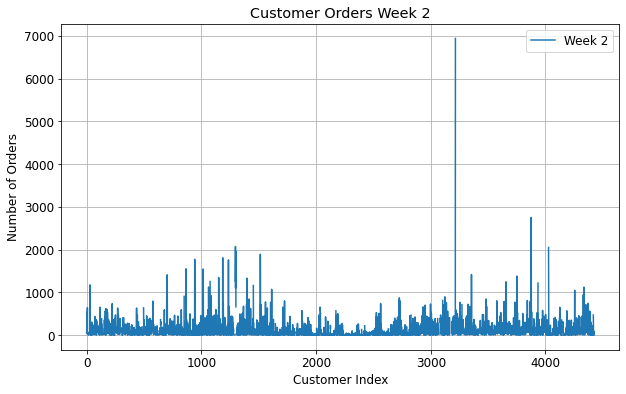

6938.0


In [300]:
# Line plot: Orders Week 1 and Week 2
plt.figure(figsize=(10, 6))
#plt.plot(data['Orders Week 1'], label='Week 1')
plt.plot(df['Orders Week 2'], label='Week 2')
plt.title('Customer Orders Week 2')
plt.xlabel('Customer Index')
plt.ylabel('Number of Orders')
plt.legend()
plt.grid()
plt.show()

print(data['Orders Week 2'].max())

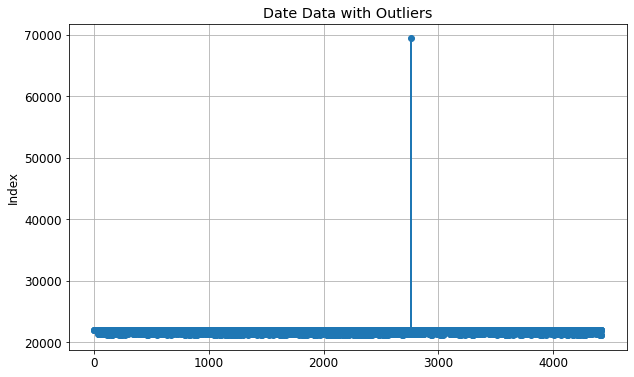

In [409]:
plt.figure(figsize=(10, 6))
plt.plot(df['Last Product Usage Date'],  marker='o', linestyle='-')
plt.ylabel('Last Product Usage Date')
plt.ylabel('Index')
plt.title('Date Data with Outliers')
plt.grid(True)

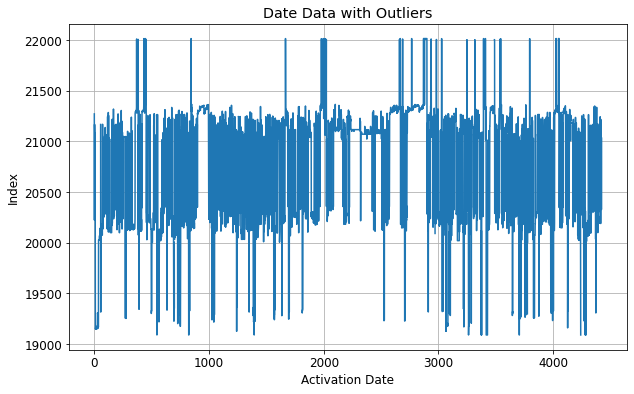

In [410]:
plt.figure(figsize=(10, 6))
plt.plot(df['Activation Date'], linestyle='-')
plt.xlabel('Activation Date')
plt.ylabel('Index')
plt.title('Date Data with Outliers')
plt.grid(True)

In [443]:
df['Highest Product_num'] = df['Highest Product'].replace({'Unknown': 0, 'POS Integration': 1, 'Order Manager': 2, 'Premium': 3, 'Premium + POS': 4})
df['Highest Product_num']  = df['Highest Product_num'].astype(float)  

feat_num.append('Highest Product_num') if 'Highest Product_num' not in feat_num else feat_num

['# Printers',
 '# Tablets',
 'Orders Week 2',
 'Orders Week 1',
 'Printed Orders Week 2',
 'Printed Orders Week 1',
 'Cancellations Week 2',
 'Cancellations Week 1',
 'Missed Orders Week 2',
 'Missed Orders Week 1',
 'Average Order Week 2',
 'Average Order Value week 1',
 'Last Product Usage Date',
 'Activation Date',
 'Number of online delivery partners',
 'Highest Product_num']

In [469]:
### Deal with abnormal dates

#def outliers_IQR(df):#

#    q1 = df.quantile(0.25)
#    q3 = df.quantile(0.75)
#    IQR = q3-q1
#    upper_lim = q3+1.5*IQR
#    lower_lim = q1-1.5*IQR
#    outliers = df[(df< lower_lim) | (df> upper_lim)]
#
#    return outliers, upper_lim, lower_lim



> Assume the dates should not ne later than today's date and should not be earlier than 2000

In [519]:
df.dtypes

Customer Success Associate             object
Parent Restaurant name                 object
Unique Location ID                     object
Highest Product                        object
# Printers                            float64
# Tablets                             float64
Orders Week 2                         float64
Orders Week 1                         float64
Printed Orders Week 2                 float64
Printed Orders Week 1                 float64
Cancellations Week 2                  float64
Cancellations Week 1                  float64
Missed Orders Week 2                  float64
Missed Orders Week 1                  float64
Average Order Week 2                  float64
Average Order Value week 1            float64
Last Product Usage Date               float64
Payment Status                         object
Activation Date                       float64
Number of online delivery partners    float64
Highest Product_num                   float64
dtype: object

In [521]:

use_ind = df1['Last Product Usage Date'].index[df1['Last Product Usage Date'] == df1['Last Product Usage Date'].max()]
df1.loc[use_ind, 'Last Product Usage Date'] = None

In [522]:
df1 = df.fillna(0)

In [343]:
ind1 = (df1['Average Order Value week 1'].index[df1['Average Order Value week 1'] == df1['Average Order Value week 1'].max()])
print(df1['Average Order Week 2'].index[df1['Average Order Week 2'] == df1['Average Order Week 2'].max()])

Int64Index([2059], dtype='int64')


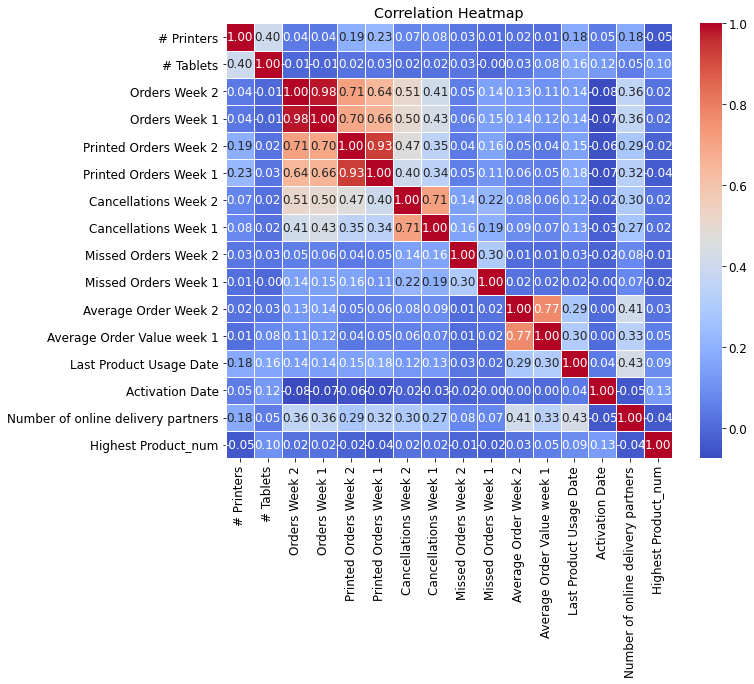

In [312]:
correlation_matrix = df1.corr()

# Create the correlation heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Part 1 Health Scores

Assumptions: 
1. All the ourliers and invalid data are properly imputed
2. 



In [525]:
## Assumption Today's date is 2022 Feb in Juliant format
today_j = int(pd.Timestamp.today().strftime('%y%j'))

In [ ]:
lis = [1,2,3]

> Create some columns useful for calculating health scores

In [653]:

orders_col = df1.columns[df1.columns.map(lambda x: x.startswith("Orders Week"))]
orders_col = sorted(orders_col, key = lambda sub : sub[-1])
avg_val_col = df1.columns[df1.columns.map(lambda x: x.startswith("Average Order"))]
avg_val_col = sorted(avg_val_col, key = lambda sub : sub[-1])


In [736]:
df1['Total_orders'] = df1[orders_col].sum(axis=1) # Total order numbers
df1['Total_Cancellation'] = df1[df1.columns[df1.columns.map(lambda x: x.startswith("Cancellations"))]].sum(axis=1)
df1['Total_Missed'] = df1[df1.columns[df1.columns.map(lambda x: x.startswith("Missed Orders"))]].sum(axis=1)
df1['Total_Printed'] = df1[df1.columns[df1.columns.map(lambda x: x.startswith("Printed Orders"))]].sum(axis=1)

In [663]:
df_total_val = pd.DataFrame([df1[orders_col[i]].multiply(df1[avg_val_col[i]]) for i in range(len(avg_val_col))]).T

df_total_val.columns = ['Total_Order_Val_Week_{0}'.format(i) for i in range(1,len(orders_col)+1)]
df_total_val

,Total_Order_Val_Week_1,Total_Order_Val_Week_2
0,1362.60,1174.53
1,1360.22,1339.03
2,1961.52,1854.09
3,1275.84,1561.00
4,26114.30,25482.48
...,...,...
4419,623.16,430.98
4420,1829.79,2019.20
4421,0.00,0.00
4422,3151.15,2747.70


In [721]:
df1['Total_Order_Value'] = df_total_val.sum(axis=1)

In [671]:
df_orders_change_rate = df1[orders_col].pct_change(axis='columns', periods = 1).iloc[:,1:]
df_orders_change_rate.columns = ['Orders_Change_Rate_{0}'.format(i) for i in range(2,len(orders_col)+1)]
df_orders_change_rate

,Orders_Change_Rate_2
0,-0.216667
1,-0.195652
2,-0.045455
3,0.041667
4,-0.054867
...,...
4419,-0.388889
4420,-0.012346
4421,NaN
4422,-0.158879


In [691]:
## Simplified Retention Score based on 'Last Product Usage Date' and 'Activation Date'
## Retention Score = (Time Active in Retention Window) / (Total Time Since Activation)
## Assume retention window is from the min. of the 'Activation Date' till today

import datetime

retention_window = today_j - df['Activation Date'].min()

# Calculate time since activation and retention score
df1['Time Active'] = df1['Last Product Usage Date'] - df1['Activation Date']
df1['Retention Score'] = df1['Time Active'].apply(lambda x: min(x / retention_window, 1.0))

# Normalize the retention score
df1['Normalized Retention Score'] = (df1['Retention Score'] - df1['Retention Score'].min()) / (df1['Retention Score'].max() - df1['Retention Score'].min())


In [729]:
df1['Loyalty'] = df1['Last Product Usage Date'] - df1['Activation Date'] #longer the better, but not signif

In [713]:
## Churn Rate: voluntary + involuntary
## Assume invol. churned if not active after Aug 2021; vol churn: payment status = cancelled

churn_thre = int(pd.Timestamp('08/01/2021').strftime('%y%j'))

# Calculate churn status
df1['Churned'] = [(1 if ((last_usage < churn_thre) or (payment_status == 'Cancelled')) else 0)
                  for last_usage, payment_status in zip(df1['Last Product Usage Date'], df1['Payment Status'])]


In [316]:
def normalize(arr,t_min, t_max):
    norm_arr = []
    clip_min = np.percentile(arr, 1)
    clip_max = np.percentile(arr, 99)
    diff = t_max - t_min
    diff_arr = clip_max - clip_min   

    for i in arr:
        temp = (((i - clip_min)*diff)/ diff_arr) + t_min
        temp = min(temp, 1)
        norm_arr.append(temp)
        
    return norm_arr



In [730]:
df1['Total_Order_Value_norm'] = normalize(df1['Total_Order_Value'],0,1)
df1['Loyalty_norm'] = normalize(df1['Loyalty'],0,1)

In [725]:
df1['Total_Order_Value_norm'].describe()

count    4424.000000
mean        0.117912
std         0.179977
min         0.000000
25%         0.002852
50%         0.049005
75%         0.153103
max         1.000000
Name: Total_Order_Value_norm, dtype: float64

In [735]:
df1.columns

Index(['Customer Success Associate', 'Parent Restaurant name',
       'Unique Location ID', 'Highest Product', '# Printers', '# Tablets',
       'Orders Week 2', 'Orders Week 1', 'Printed Orders Week 2',
       'Printed Orders Week 1', 'Cancellations Week 2', 'Cancellations Week 1',
       'Missed Orders Week 2', 'Missed Orders Week 1', 'Average Order Week 2',
       'Average Order Value week 1', 'Last Product Usage Date',
       'Payment Status', 'Activation Date',
       'Number of online delivery partners', 'Highest Product_num',
       'Total_orders', 'Time Active', 'Retention Score',
       'Normalized Retention Score', 'Churned', 'Loyalty', 'Total_Order_Value',
       'Total_Order_Value_norm', 'Loyalty_norm', 'Total_Cancellation',
       'Total_Missed'],
      dtype='object')

> Weights can be adjusted by cases. Here is just an example.

In [755]:
import pandas as pd


# Function to calculate the customer health score
def calculate_health_score(row):
    # Define weights for different factors (adjust as per business needs)
    weights = {
        'Order Discrepancy': - 10,
        'Cancellation Rate': - 5,
        'Missed Orders Rate': - 5,
        'Churn Score': -10,
        
        'Payment Status Score': 25,
        'Order Value Score': 25,
        'Loyalty Score' : 20,
        'Retention Score': 20,

#        'Feature Adoption': 10,
        'Delivery Partner Score': 10,
        'Highest Product Score': 20
        
    } # weights in percentage
    

    # order fulfillment and operational efficiency: 
    # significant discrepancy b/w ttl oders and printed orders could be a red flag
    # Cancellation may indicates dissatisfaction, and missed oders may indicates low operational efficiency 
    # It may signify that the restaurant is facing challenges in fulfilling customer orders or managing their operational processes effectively

    
    if row['Total_orders'] != 0:
        order_disc_rate = (row['Total_orders']  - row['Total_Printed'])/row['Total_orders'] 
        cancellation_rate = row['Total_Cancellation'] / row['Total_orders']
        missed_rate = row['Total_Missed']  / row['Total_orders']
    else:
        order_disc_rate = cancellation_rate = missed_rate = 0
    
    
    # Payment Status Score: Higher score for 'Active' status
    payment_status_score = 1 if row['Payment Status'] == 'Active' else 0.5
    
    # Payment Status Score
    order_value_score = row['Total_Order_Value_norm']
    
    # Activation Date Score: early activation date may indicate stable and loyal partnership
    loyalty_score = row['Loyalty_norm'] 

    retention_score = row['Normalized Retention Score']
    if_churn = row['Churned']

    
    # Printer and Tablet Score: Higher score for more devices requested 
    # feature_adoption_score = (row['# Printers']/df1['# Printers'].max() + row['# Tablets']/df1['# Tablets'].max())/2
    
    # More delivery partners may indicate more product nt65eeds 
    del_partner_score = row['Number of online delivery partners']/df1['Number of online delivery partners'].max()
    
    high_product_score = row['Highest Product_num']/df1['Highest Product_num'].max()

    # Calculate the final health score
    health_score = (
        weights['Order Discrepancy'] * order_disc_rate +
        weights['Cancellation Rate'] * cancellation_rate +
        weights['Missed Orders Rate'] * missed_rate + 
        weights['Churn Score'] * if_churn + 
        
        weights['Payment Status Score'] * payment_status_score +
        weights['Order Value Score'] * order_value_score +
        weights['Loyalty Score'] * loyalty_score +
        weights['Retention Score'] * retention_score +

       # weights['Feature Adoption Score'] * feature_adoption_score + 
        weights['Delivery Partner Score'] * del_partner_score +
        weights['Highest Product Score'] * high_product_score
        
    )
    
    
    #print([order_disc_rate,cancellation_rate,missed_rate,payment_status_score,order_value_score,activation_date_score,printer_tablet_score,del_partner_score,high_product_score])

    return health_score




In [771]:
df1['Customer Success Associate'].unique()

array(['Jimmy ', 'Sanks', 'Chema', 'Alex', 'Nicole', 'Tobias', 'Drogo',
       'Dolly ', 'Rupert', 'Rothschild', 'Mary'], dtype=object)

In [745]:
df_score = df1.copy()
f_data = data if selected_item == 'Overall' else data[data['Payment Status'] == selected_item]¥

In [757]:
health_score = []
for i in range(len(df1)):
    health_score.append(calculate_health_score(df1.iloc[i]))
health_score = pd.DataFrame(health_score)

In [759]:
health_score.sort_values(by = [0], ascending = False)

,0
28,112.714689
1076,110.066202
29,107.213627
1603,106.682303
1559,105.447940
...,...
2209,-4.591852
1215,-6.460177
4053,-10.980395
4051,-11.036690


In [760]:
# Add a new column for the health score
df_score['Health_Score'] = df_score.apply(calculate_health_score, axis=1)
df_score

,Customer Success Associate,Parent Restaurant name,Unique Location ID,Highest Product,# Printers,# Tablets,Orders Week 2,Orders Week 1,Printed Orders Week 2,Printed Orders Week 1,...,Normalized Retention Score,Churned,Loyalty,Total_Order_Value,Total_Order_Value_norm,Loyalty_norm,Total_Cancellation,Total_Missed,Total_Printed,Health_Score
0,Jimmy,Restaurant 747,06dc26c0-9998-4912-b026-dd0e3e8acdff,Order Manager,1.0,1.0,47.0,60.0,47.0,60.0,...,0.870453,0,744.0,2537.13,0.045278,0.913210,2.0,0.0,107.0,75.711761
1,Jimmy,Restaurant 432,36677987-7739-492d-a034-f94f22bae72f,Premium,0.0,0.0,37.0,46.0,0.0,0.0,...,0.910499,0,1791.0,2699.25,0.048171,0.956486,4.0,0.0,0.0,61.803015
2,Jimmy,Restaurant 747,1955165c-d286-4d09-aed9-27c908c26503,Order Manager,1.0,1.0,63.0,66.0,62.0,66.0,...,0.874431,0,848.0,3815.61,0.068094,0.917509,2.0,0.0,128.0,76.386107
3,Jimmy,Restaurant 747,fc15619e-87c6-4326-8f20-e71b8bd55662,Order Manager,1.0,1.0,50.0,48.0,50.0,48.0,...,0.874431,0,848.0,2836.84,0.050627,0.917509,2.0,0.0,98.0,76.002423
4,Jimmy,Restaurant 719,ef394528-735d-4307-aebe-034aa5e4966c,Premium + POS,1.0,0.0,534.0,565.0,0.0,0.0,...,0.877720,0,934.0,51596.78,0.920802,0.921064,5.0,0.0,0.0,97.972987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Rothschild,Restaurant 950,36279ef8-5f1b-4408-887d-6c9172bbf9c3,Order Manager,1.0,0.0,22.0,36.0,21.0,24.0,...,0.037139,1,-21043.0,1054.14,0.018812,0.012689,0.0,0.0,45.0,15.725493
4420,Rothschild,Restaurant 472,a125eeb0-8c1c-474f-8388-10af189035b9,Order Manager,1.0,0.0,80.0,81.0,80.0,80.0,...,0.880321,0,1002.0,3848.99,0.068690,0.923874,1.0,0.0,160.0,64.207980
4421,Mary,Restaurant 656,a59ef998-67e8-4622-b302-9a8abb63b85e,Order Manager,1.0,0.0,0.0,0.0,0.0,0.0,...,0.876305,0,897.0,0.00,0.000000,0.919534,0.0,0.0,0.0,58.416789
4422,Mary,Restaurant 309,e583a315-cf3d-4153-b398-fecb0b584fba,Order Manager,1.0,0.0,90.0,107.0,90.0,107.0,...,0.906483,0,1686.0,5898.85,0.105272,0.952146,3.0,0.0,197.0,68.228228


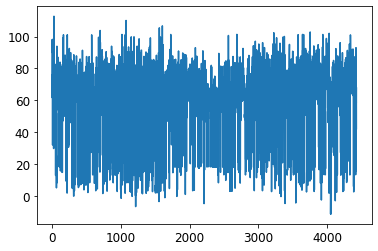

In [761]:
plt.plot(df_score['Health_Score'])

In [24]:
df_score[df_score['Health_Score'] == df_score['Health_Score'].max()]['Unique Location ID'].values[0]

'd2f4c49f-d15d-40a3-a0e1-05fcb5d22800'

In [42]:
data['Customer Success Associate'].str.strip()[0]

'Jimmy'

In [763]:
df_score.sort_values(by = 'Health_Score', ascending=False)

,Customer Success Associate,Parent Restaurant name,Unique Location ID,Highest Product,# Printers,# Tablets,Orders Week 2,Orders Week 1,Printed Orders Week 2,Printed Orders Week 1,...,Normalized Retention Score,Churned,Loyalty,Total_Order_Value,Total_Order_Value_norm,Loyalty_norm,Total_Cancellation,Total_Missed,Total_Printed,Health_Score
28,Jimmy,Restaurant 405,d2f4c49f-d15d-40a3-a0e1-05fcb5d22800,Premium + POS,0.0,0.0,1172.0,549.0,1170.0,544.0,...,0.945496,0,2706.0,66079.29,1.000000,0.994306,14.0,0.0,1714.0,112.714689
1076,Alex,Restaurant 122,174075b4-e0a1-427e-ad70-646691f05682,Premium + POS,1.0,1.0,1250.0,1232.0,1249.0,1232.0,...,0.880283,0,1001.0,129552.58,1.000000,0.923833,6.0,0.0,2481.0,110.066202
29,Jimmy,Restaurant 405,f6ba35bd-656a-4633-921a-b50f1d1a38e6,Premium + POS,0.0,0.0,712.0,677.0,707.0,672.0,...,0.945726,0,2712.0,43775.19,0.781217,0.994554,14.0,0.0,1379.0,107.213627
1603,Alex,Restaurant 1132,2c1430a1-b499-48a0-99c3-3d8166944c88,Premium + POS,1.0,1.0,506.0,593.0,504.0,592.0,...,0.877873,0,938.0,48852.75,0.871832,0.921229,15.0,0.0,1096.0,106.682303
1559,Alex,Restaurant 1005,39b3c549-c9d9-4ef9-8a70-e22ba19d7d16,Premium + POS,1.0,1.0,773.0,942.0,773.0,939.0,...,0.913750,0,1876.0,47145.66,0.841367,0.959999,15.0,0.0,1712.0,105.447940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2209,Nicole,Restaurant 51,f0005b8e-e915-3f1a-ab01-7199eb588cef,Unknown,0.0,0.0,9.0,6.0,0.0,0.0,...,0.029910,1,-21232.0,476.07,0.008496,0.004877,0.0,0.0,0.0,-4.591852
1215,Alex,Restaurant 142,239f2c96-5310-4890-b8eb-f6d56c167fa2,POS Integration,0.0,0.0,0.0,1.0,0.0,0.0,...,0.037904,1,-21023.0,25.61,0.000457,0.013516,1.0,0.0,0.0,-6.460177
4053,Rupert,Restaurant 17,c860b758-7f01-4773-a518-959a1679df9c,Unknown,1.0,1.0,5.0,0.0,0.0,0.0,...,0.000000,1,-22014.0,153.55,0.002740,-0.027445,5.0,0.0,0.0,-10.980395
4051,Rupert,Restaurant 17,6ae7565a-c063-4ff3-ba2b-862cd7c58e5c,Unknown,1.0,1.0,1.0,0.0,0.0,0.0,...,0.000000,1,-22014.0,27.37,0.000488,-0.027445,1.0,0.0,0.0,-11.036690


In [765]:
df_score.to_excel('Data_Score.xlsx')